#Semantic Role Labeling(SRL) with AllenNLP, BERT


copyright 2023, Denis Rothman, MIT License.

The notebook is an implementation of the Allen Institute for AI BERT-based model. [Reference usage of the Notebook](https://demo.allennlp.org/semantic-role-labeling/MjE4NjI1Ng==)


The BERT-based model is an implementation of [Peng Shi and Jimmy Lin, (2019), ‘Simple BERT Models for Relation Extraction and Semantic Role Labeling’]( https://arxiv.org/abs/1904.05255)

# Installing AllenNLP models and libraries to display the outputs

In [ ]:
!pip install --upgrade allennlp allennlp-models -qq

In [ ]:
from IPython.display import Image     #This is used for rendering images in the notebook

In [ ]:
#This cell will be deleted when the repository is made public
import requests
from PIL import Image
from io import BytesIO

#Development access to delete when going into production
from google.colab import drive
drive.mount('/content/drive')

with open('drive/MyDrive/files/github.txt', 'r') as f:
    github_token = f.read().strip()

def get_image_from_github(image_name):
    # Your personal access token
    token = github_token

    # Headers for the request
    headers = {'Authorization': f'token {token}'}

    # The base URL of the image files in the GitHub repository
    base_url = 'https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Notebook%20images/10/'

    # Make the request
    response = requests.get(base_url + image_name, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Read the image
        image = Image.open(BytesIO(response.content))

        # Return the image
        return image
    else:
        print(f'Error {response.status_code}: Could not access the image file.')
        return None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the predictory and the tagging module

In [ ]:
import json
from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging

In [ ]:
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/structured-prediction-srl-bert.2020.12.15.tar.gz")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import pandas as pd
from collections import defaultdict

# Creating functions to display SRL predictions

In [ ]:
def head(prediction):
  # Iterating through the json to display the description of each verb of the SRL the prediction
  for i in prediction['verbs']:
    print('Verb:',i['verb'],i['description'])

In [ ]:
def full(prediction):
  #print the full prediction
  print(json.dumps(prediction, indent = 1, sort_keys=True))

In [ ]:
def fp_pd(prediction):
  # Create a DataFrame: words in column 1
  df = pd.DataFrame(prediction['words'], columns=['words'])
  # Initialize a default dictionary to store counters for each verb
  verb_counter = defaultdict(int)

  # Iterate over the verbs
  for verb_info in prediction['verbs']:
      # If the verb already has a column, increment its counter
      if verb_info['verb'] in df.columns:
          verb_counter[verb_info['verb']] += 1
          verb_column_name = f"{verb_info['verb']}_{verb_counter[verb_info['verb']]}"
      else:
          verb_column_name = verb_info['verb']

      # a column in the DataFrame for each verb
      df[verb_column_name] = pd.Series(verb_info['tags'])
  return df

#Basic samples

## Sample 1

"Did Bob really think he could prepare a meal for 50 people in only a few hours?"

In [ ]:
prediction=predictor.predict(
    sentence="Did Bob really think he could prepare a meal for 50 people in only a few hours?"
)
head(prediction)

Verb: Did [V: Did] Bob really think he could prepare a meal for 50 people in only a few hours ?
Verb: think Did [ARG0: Bob] [ARGM-ADV: really] [V: think] [ARG1: he could prepare a meal for 50 people in only a few hours] ?
Verb: could Did Bob really think he [V: could] [ARG1: prepare a meal for 50 people in only a few hours] ?
Verb: prepare Did Bob really think [ARG0: he] [ARGM-MOD: could] [V: prepare] [ARG1: a meal for 50 people] [ARGM-TMP: in only a few hours] ?


In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_02.png', width=800) #This is used for rendering images in the notebook

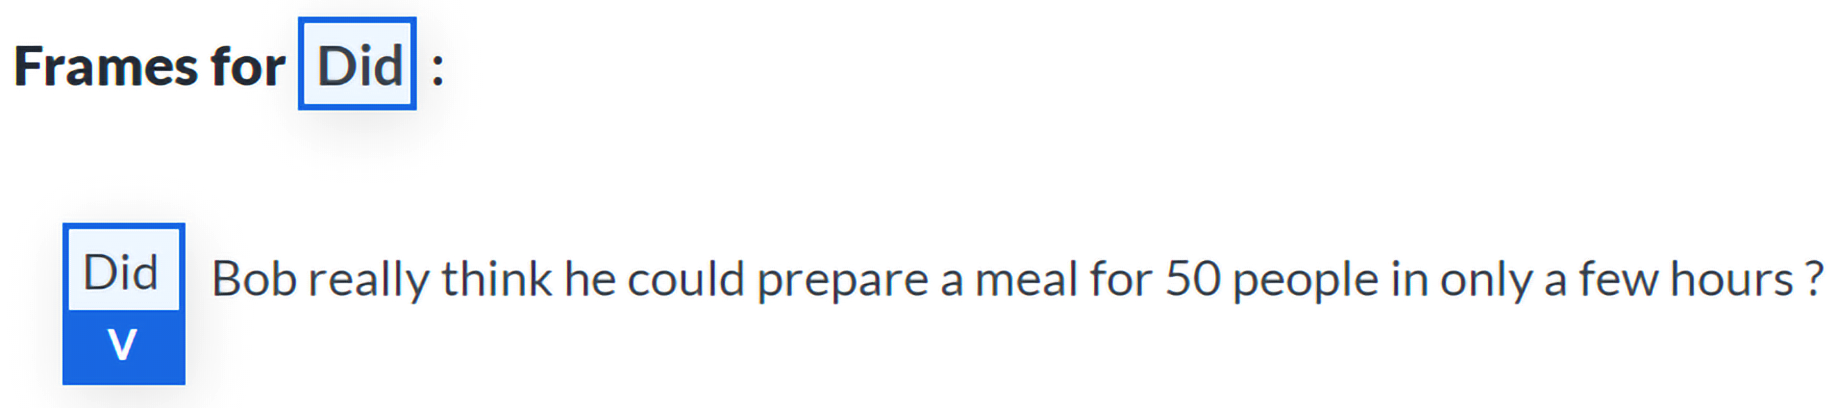

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_02.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_03.png', width=800) #This is used for rendering images in the notebook

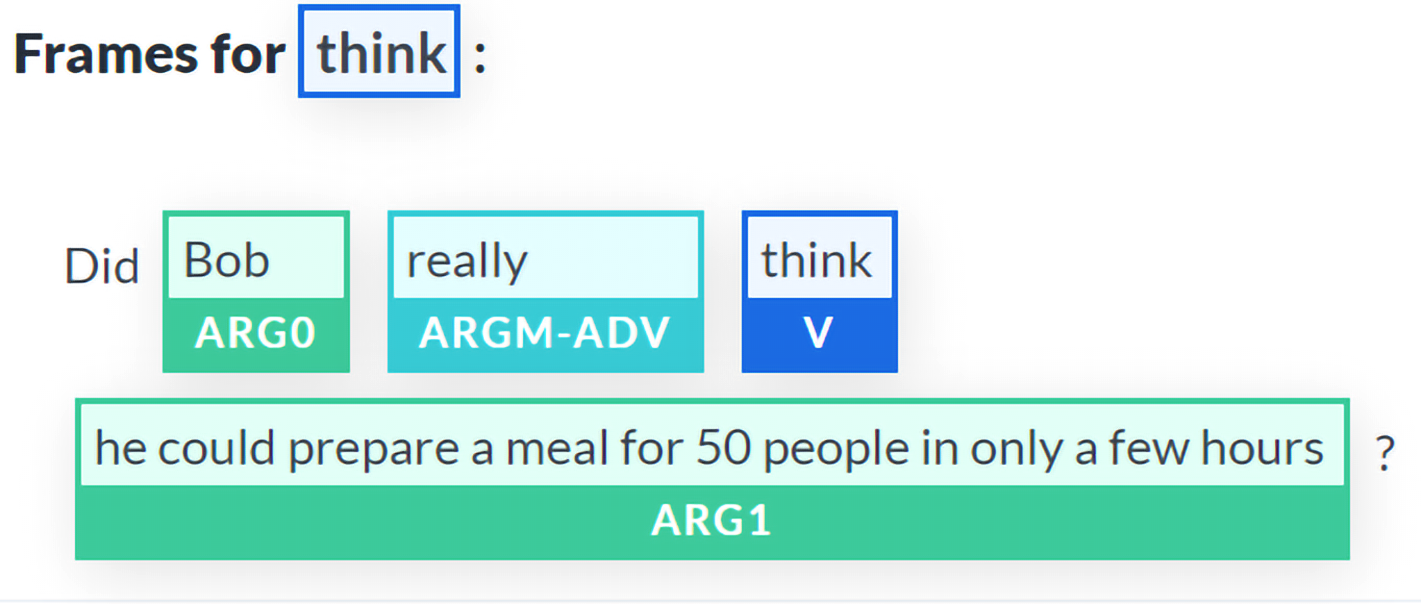

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_03.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_04.png', width=800) #This is used for rendering images in the notebook

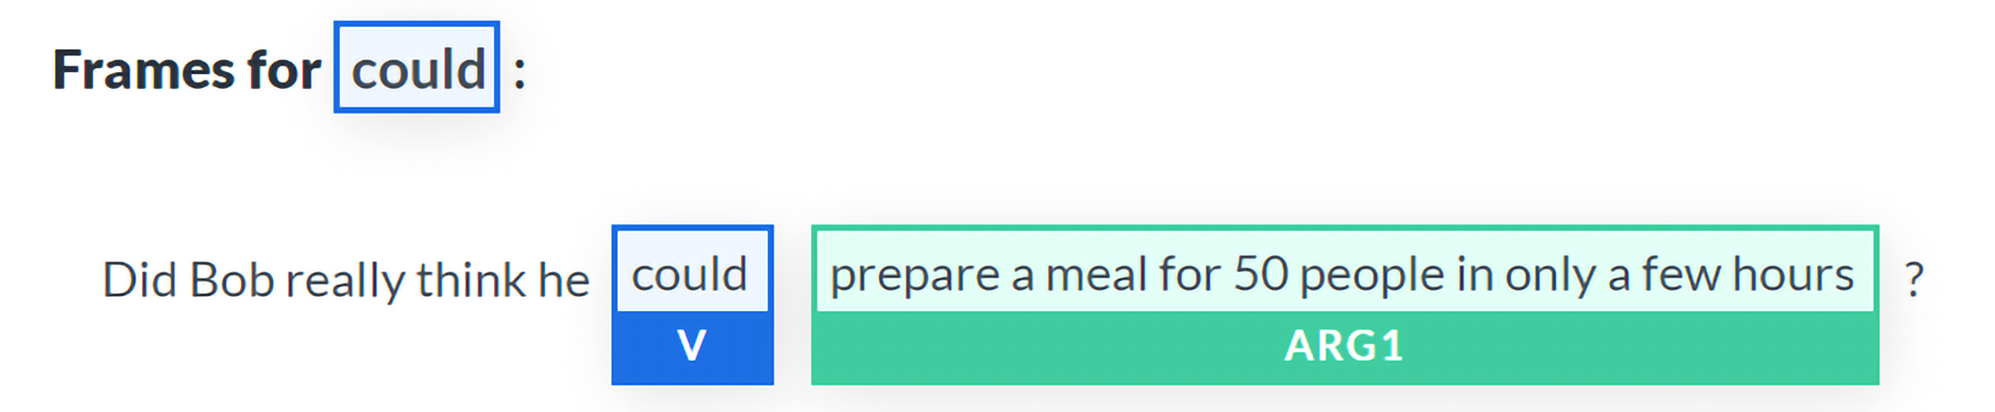

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_04.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_05.png', width=800) #This is used for rendering images in the notebook

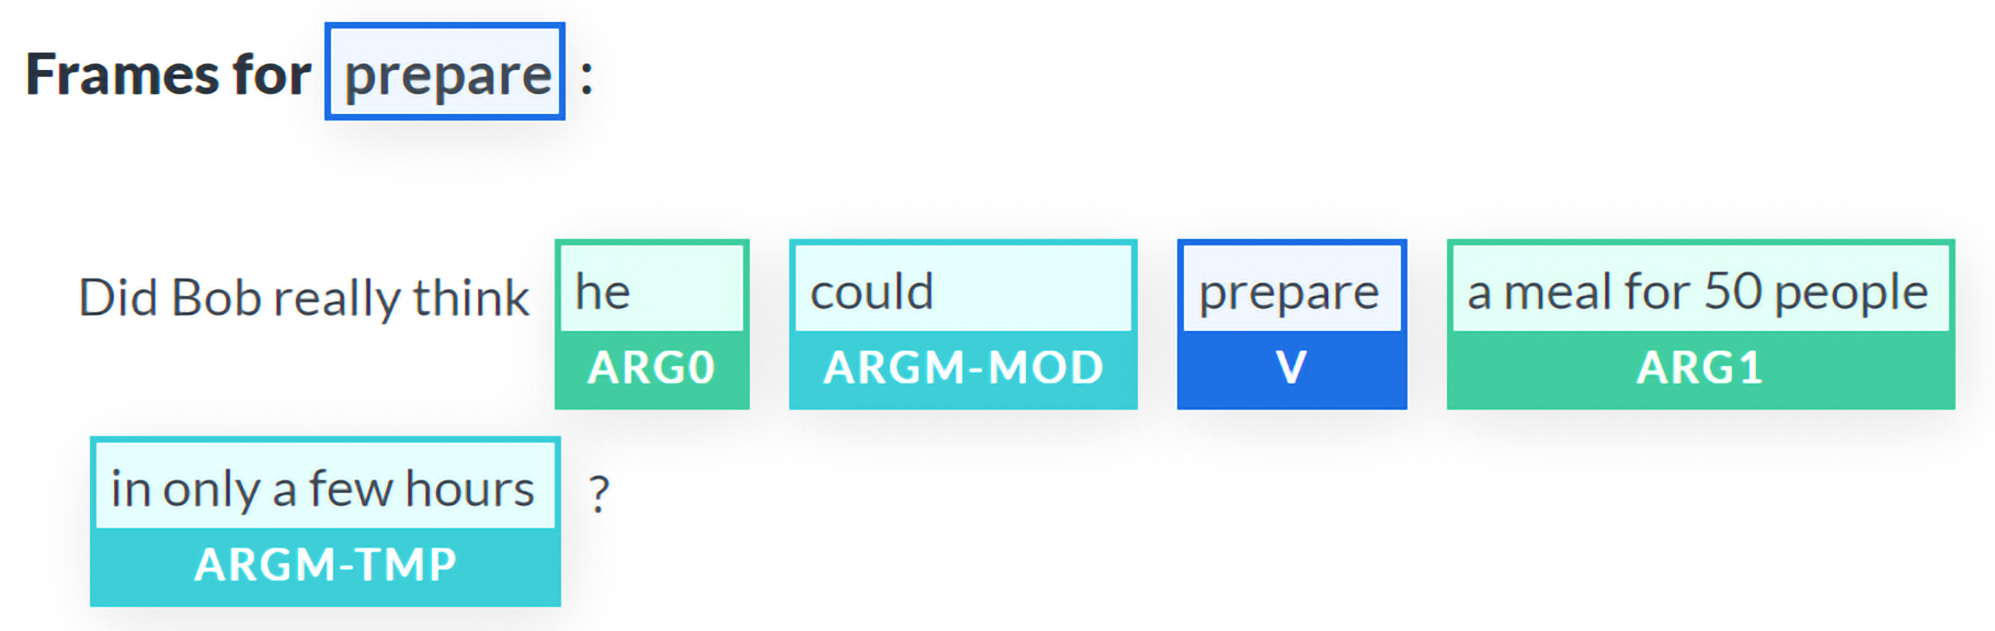

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_05.png') or print('Image not found'))

In [ ]:
jprediction=full(prediction)

{
 "verbs": [
  {
   "description": "[V: Did] Bob really think he could prepare a meal for 50 people in only a few hours ?",
   "tags": [
    "B-V",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O"
   ],
   "verb": "Did"
  },
  {
   "description": "Did [ARG0: Bob] [ARGM-ADV: really] [V: think] [ARG1: he could prepare a meal for 50 people in only a few hours] ?",
   "tags": [
    "O",
    "B-ARG0",
    "B-ARGM-ADV",
    "B-V",
    "B-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "O"
   ],
   "verb": "think"
  },
  {
   "description": "Did Bob really think he [V: could] [ARG1: prepare a meal for 50 people in only a few hours] ?",
   "tags": [
    "O",
    "O",
    "O",
    "O",
    "O",
    "B-V",
    "B-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
   

In [ ]:
#call the DataFrame function and display the full prediction
fp_pd(prediction)

words  Did       think   could     prepare
0       Did  B-V           O       O           O
1       Bob    O      B-ARG0       O           O
2    really    O  B-ARGM-ADV       O           O
3     think    O         B-V       O           O
4        he    O      B-ARG1       O      B-ARG0
5     could    O      I-ARG1     B-V  B-ARGM-MOD
6   prepare    O      I-ARG1  B-ARG1         B-V
7         a    O      I-ARG1  I-ARG1      B-ARG1
8      meal    O      I-ARG1  I-ARG1      I-ARG1
9       for    O      I-ARG1  I-ARG1      I-ARG1
10       50    O      I-ARG1  I-ARG1      I-ARG1
11   people    O      I-ARG1  I-ARG1      I-ARG1
12       in    O      I-ARG1  I-ARG1  B-ARGM-TMP
13     only    O      I-ARG1  I-ARG1  I-ARGM-TMP
14        a    O      I-ARG1  I-ARG1  I-ARGM-TMP
15      few    O      I-ARG1  I-ARG1  I-ARGM-TMP
16    hours    O      I-ARG1  I-ARG1  I-ARGM-TMP
17        ?    O           O       O           O

## Sample 2

"Mrs. and Mr. Tomaso went to Europe for vacation and visited Paris and first went to visit the Eiffel Tower."

In [ ]:
prediction=predictor.predict(
    sentence="Mrs. and Mr. Tomaso went to Europe for vacation and visited Paris and first went to visit the Eiffel Tower."
)
head(prediction)

Verb: went [ARG0: Mrs. and Mr. Tomaso] [V: went] [ARG4: to Europe] [ARGM-PRP: for vacation] and visited Paris and first went to visit the Eiffel Tower .
Verb: visited [ARG0: Mrs. and Mr. Tomaso] went to Europe for vacation and [V: visited] [ARG1: Paris] and first went to visit the Eiffel Tower .
Verb: went [ARG0: Mrs. and Mr. Tomaso] went to Europe for vacation and visited Paris and [ARGM-TMP: first] [V: went] [ARG1: to visit the Eiffel Tower] .
Verb: visit [ARG0: Mrs. and Mr. Tomaso] went to Europe for vacation and visited Paris and first went to [V: visit] [ARG1: the Eiffel Tower] .


In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_06.png', width=800) #This is used for rendering images in the notebook

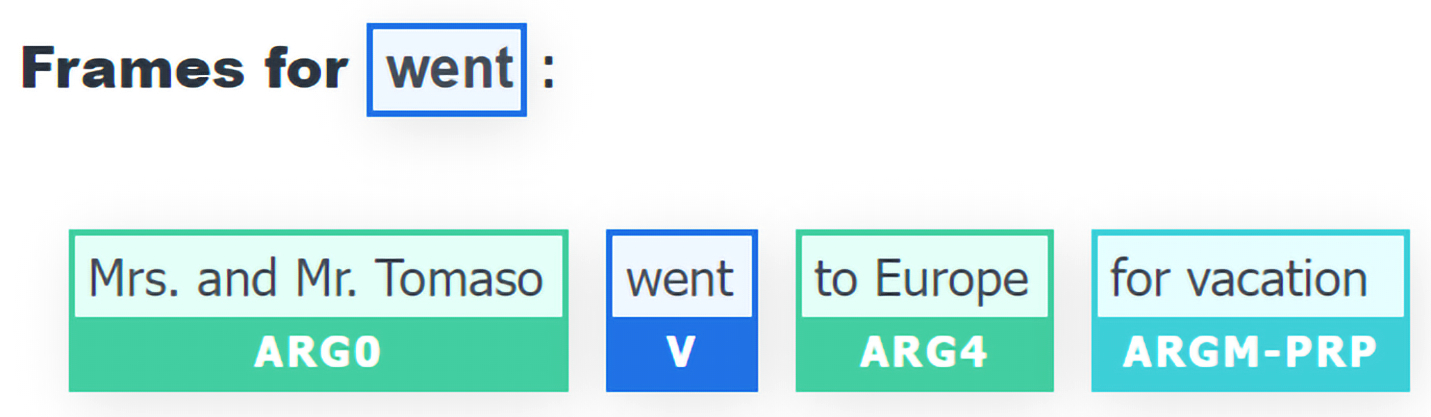

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_06.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_07.png', width=800) #This is used for rendering images in the notebook

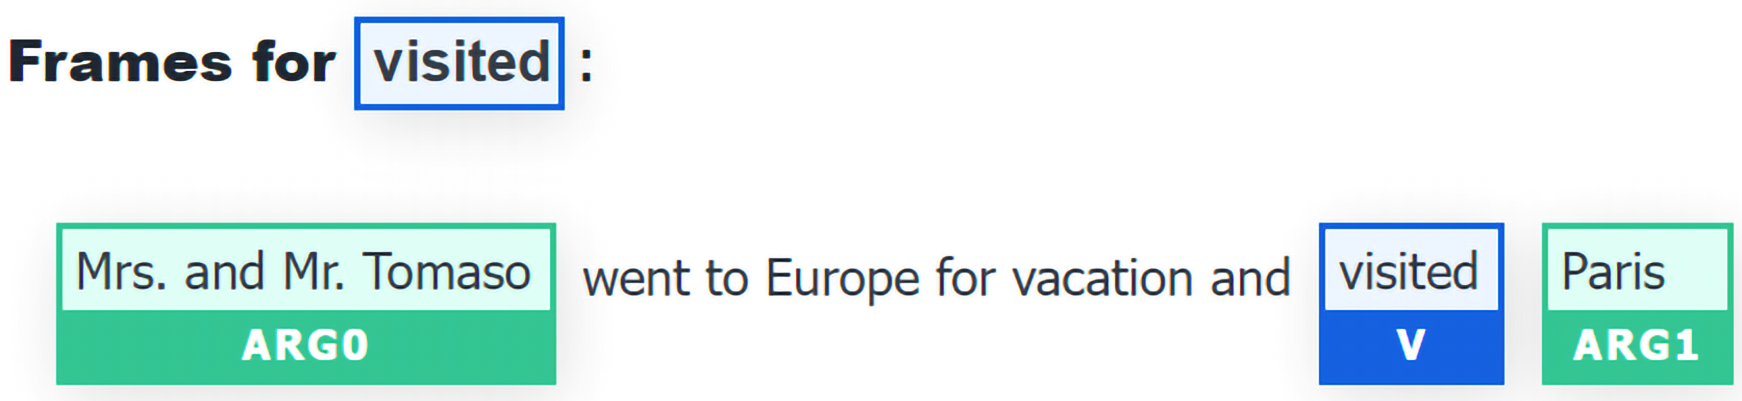

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_07.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_08.png', width=800) #This is used for rendering images in the notebook

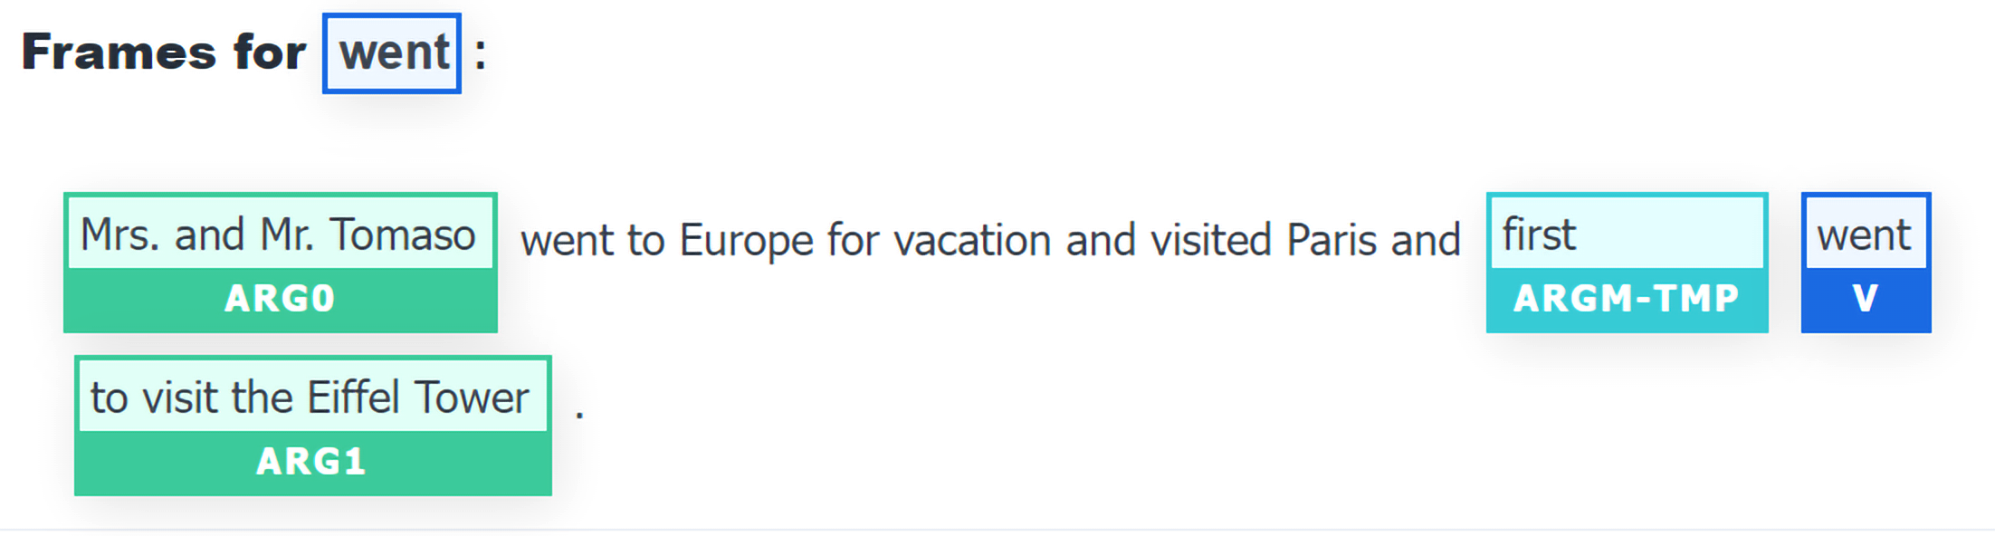

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_08.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_09.png', width=800) #This is used for rendering images in the notebook

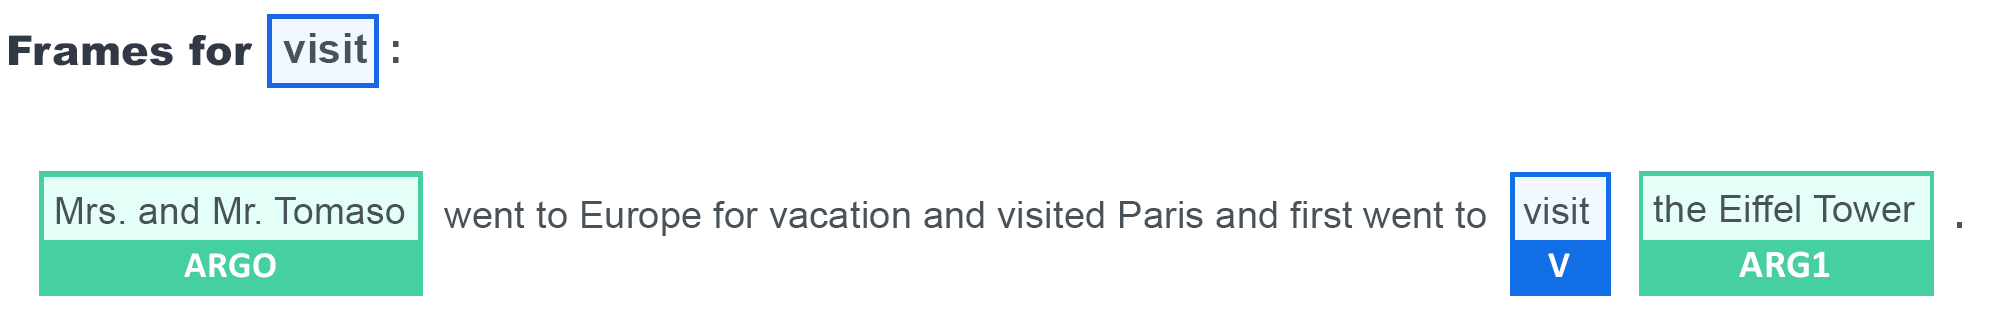

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_09.png') or print('Image not found'))

In [ ]:
full(prediction)

{
 "verbs": [
  {
   "description": "[ARG0: Mrs. and Mr. Tomaso] [V: went] [ARG4: to Europe] [ARGM-PRP: for vacation] and visited Paris and first went to visit the Eiffel Tower .",
   "tags": [
    "B-ARG0",
    "I-ARG0",
    "I-ARG0",
    "I-ARG0",
    "B-V",
    "B-ARG4",
    "I-ARG4",
    "B-ARGM-PRP",
    "I-ARGM-PRP",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O"
   ],
   "verb": "went"
  },
  {
   "description": "[ARG0: Mrs. and Mr. Tomaso] went to Europe for vacation and [V: visited] [ARG1: Paris] and first went to visit the Eiffel Tower .",
   "tags": [
    "B-ARG0",
    "I-ARG0",
    "I-ARG0",
    "I-ARG0",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "B-V",
    "B-ARG1",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O"
   ],
   "verb": "visited"
  },
  {
   "description": "[ARG0: Mrs. and Mr. Tomaso] went to Europe for vacation and visited Paris and [ARGM-TMP: first] [V: w

In [ ]:
#call the DataFrame function and display the full prediction
fp_pd(prediction)

words        went visited      went_1   visit
0       Mrs.      B-ARG0  B-ARG0      B-ARG0  B-ARG0
1        and      I-ARG0  I-ARG0      I-ARG0  I-ARG0
2        Mr.      I-ARG0  I-ARG0      I-ARG0  I-ARG0
3     Tomaso      I-ARG0  I-ARG0      I-ARG0  I-ARG0
4       went         B-V       O           O       O
5         to      B-ARG4       O           O       O
6     Europe      I-ARG4       O           O       O
7        for  B-ARGM-PRP       O           O       O
8   vacation  I-ARGM-PRP       O           O       O
9        and           O       O           O       O
10   visited           O     B-V           O       O
11     Paris           O  B-ARG1           O       O
12       and           O       O           O       O
13     first           O       O  B-ARGM-TMP       O
14      went           O       O         B-V       O
15        to           O       O      B-ARG1       O
16     visit           O       O      I-ARG1     B-V
17       the           O       O      I-ARG1  B-ARG1
18    Eiffel           O       O      I-ARG1  I-ARG1
19     Tower           O       O      I-ARG1  I-ARG1
20         .           O       O           O       O

## Sample 3

"John wanted to drink tea, Mary likes to drink coffee but Karim drank some cool water and Faiza would like to drink tomato juice."

In [ ]:
prediction=predictor.predict(
    sentence="John wanted to drink tea, Mary likes to drink coffee but Karim drank some cool water and Faiza would like to drink tomato juice."
)
head(prediction)

Verb: wanted [ARG0: John] [V: wanted] [ARG1: to drink tea] , Mary likes to drink coffee but Karim drank some cool water and Faiza would like to drink tomato juice .
Verb: drink [ARG0: John] wanted to [V: drink] [ARG1: tea] , Mary likes to drink coffee but Karim drank some cool water and Faiza would like to drink tomato juice .
Verb: likes John wanted to drink tea , [ARG0: Mary] [V: likes] [ARG1: to drink coffee] but Karim drank some cool water and Faiza would like to drink tomato juice .
Verb: drink John wanted to drink tea , [ARG0: Mary] likes to [V: drink] [ARG1: coffee] but Karim drank some cool water and Faiza would like to drink tomato juice .
Verb: drank John wanted to drink tea , Mary likes to drink coffee but [ARG0: Karim] [V: drank] [ARG1: some cool water] and Faiza would like to drink tomato juice .
Verb: would John wanted to drink tea , Mary likes to drink coffee but Karim drank some cool water and [ARG0: Faiza] [V: would] like [ARG1: to drink tomato juice] .
Verb: like John

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_10.png', width=800) #This is used for rendering images in the notebook

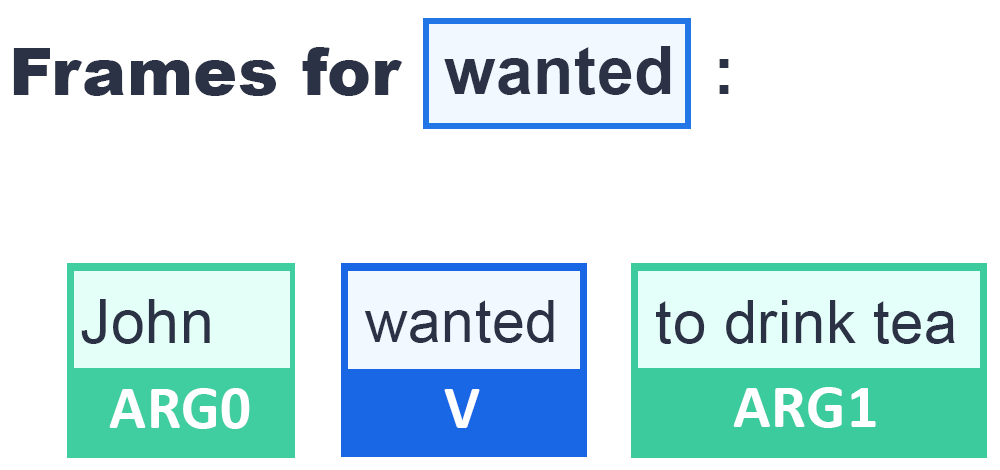

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_10.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_11.png', width=800) #This is used for rendering images in the notebook

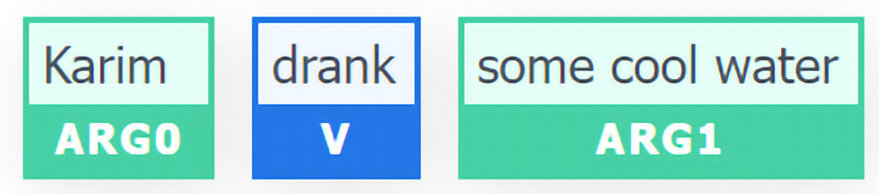

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_11.png') or print('Image not found'))

In [ ]:
full(prediction)

{
 "verbs": [
  {
   "description": "[ARG0: John] [V: wanted] [ARG1: to drink tea] , Mary likes to drink coffee but Karim drank some cool water and Faiza would like to drink tomato juice .",
   "tags": [
    "B-ARG0",
    "B-V",
    "B-ARG1",
    "I-ARG1",
    "I-ARG1",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O"
   ],
   "verb": "wanted"
  },
  {
   "description": "[ARG0: John] wanted to [V: drink] [ARG1: tea] , Mary likes to drink coffee but Karim drank some cool water and Faiza would like to drink tomato juice .",
   "tags": [
    "B-ARG0",
    "O",
    "O",
    "B-V",
    "B-ARG1",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O"
   ],
   "verb": "drink"
  },
  {
   "description": "John wanted to drink t

In [ ]:
#call the DataFrame function and display the full prediction
fp_pd(prediction)

words  wanted   drink   likes drink_1   drank   would        like drink_2
0     John  B-ARG0  B-ARG0       O       O       O       O           O       O
1   wanted     B-V       O       O       O       O       O           O       O
2       to  B-ARG1       O       O       O       O       O           O       O
3    drink  I-ARG1     B-V       O       O       O       O           O       O
4      tea  I-ARG1  B-ARG1       O       O       O       O           O       O
5        ,       O       O       O       O       O       O           O       O
6     Mary       O       O  B-ARG0  B-ARG0       O       O           O       O
7    likes       O       O     B-V       O       O       O           O       O
8       to       O       O  B-ARG1       O       O       O           O       O
9    drink       O       O  I-ARG1     B-V       O       O           O       O
10  coffee       O       O  I-ARG1  B-ARG1       O       O           O       O
11     but       O       O       O       O       O       O           O       O
12   Karim       O       O       O       O  B-ARG0       O           O       O
13   drank       O       O       O       O     B-V       O           O       O
14    some       O       O       O       O  B-ARG1       O           O       O
15    cool       O       O       O       O  I-ARG1       O           O       O
16   water       O       O       O       O  I-ARG1       O           O       O
17     and       O       O       O       O       O       O           O       O
18   Faiza       O       O       O       O       O  B-ARG0      B-ARG0  B-ARG0
19   would       O       O       O       O       O     B-V  B-ARGM-MOD       O
20    like       O       O       O       O       O       O         B-V       O
21      to       O       O       O       O       O  B-ARG1      B-ARG1       O
22   drink       O       O       O       O       O  I-ARG1      I-ARG1     B-V
23  tomato       O       O       O       O       O  I-ARG1      I-ARG1  B-ARG1
24   juice       O       O       O       O       O  I-ARG1      I-ARG1  I-ARG1
25       .       O       O       O       O       O       O           O       O

#Difficult samples

## Sample 4

"Alice, whose husband went jogging every Sunday, liked to go to a dancing class in the meantime."

In [ ]:
prediction=predictor.predict(
    sentence="Alice, whose husband went jogging every Sunday, liked to go to a dancing class in the meantime."
)
head(prediction)

Verb: went Alice , [ARG0: whose husband] [V: went] [ARG1: jogging] [ARGM-TMP: every Sunday] , liked to go to a dancing class in the meantime .
Verb: jogging Alice , [ARG0: whose husband] went [V: jogging] [ARGM-TMP: every Sunday] , liked to go to a dancing class in the meantime .
Verb: liked [ARG0: Alice , whose husband went jogging every Sunday] , [V: liked] [ARG1: to go to a dancing class in the meantime] .
Verb: go [ARG0: Alice , whose husband went jogging every Sunday] , liked to [V: go] [ARG4: to a dancing class] [ARGM-TMP: in the meantime] .


In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_12.png', width=800) #This is used for rendering images in the notebook

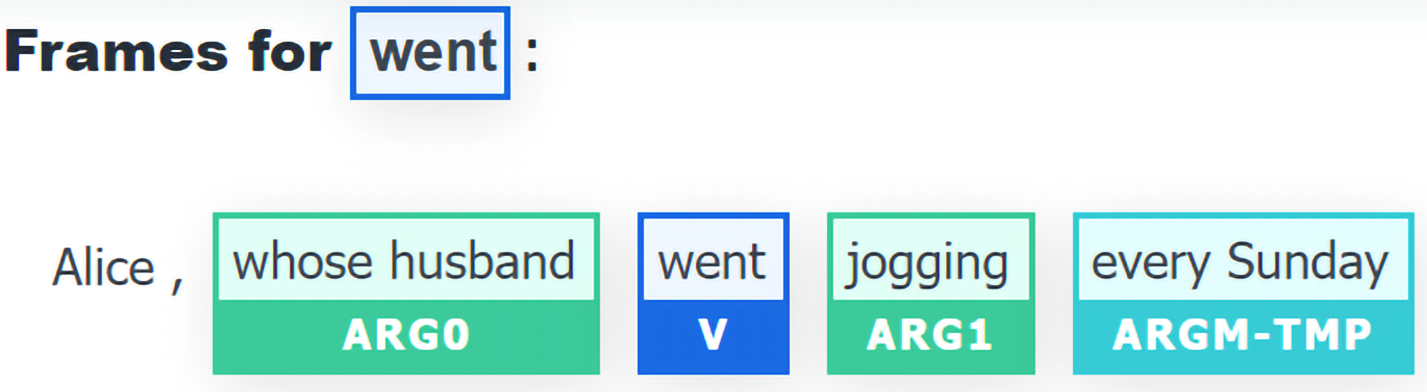

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_12.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_13.png', width=800) #This is used for rendering images in the notebook

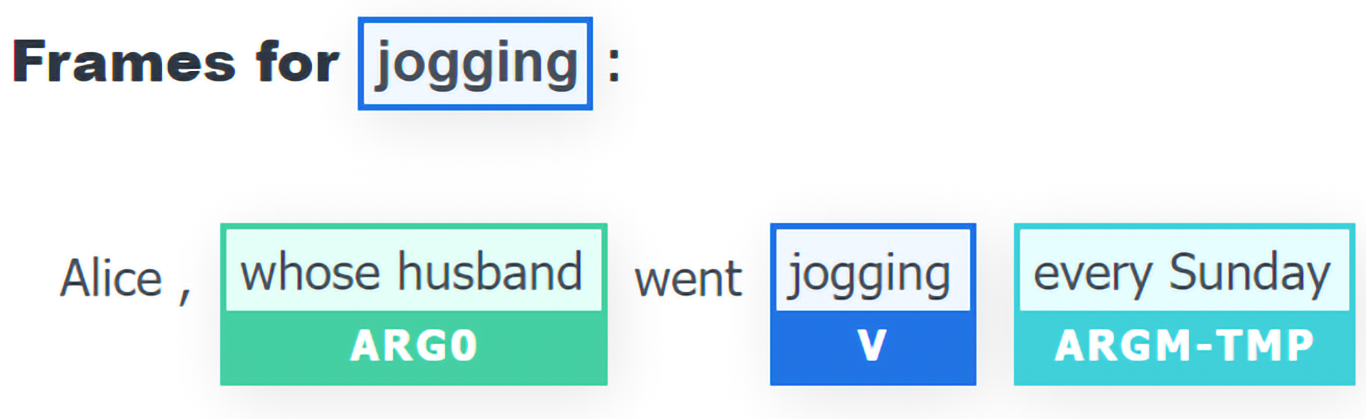

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_13.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_14.png', width=800) #This is used for rendering images in the notebook

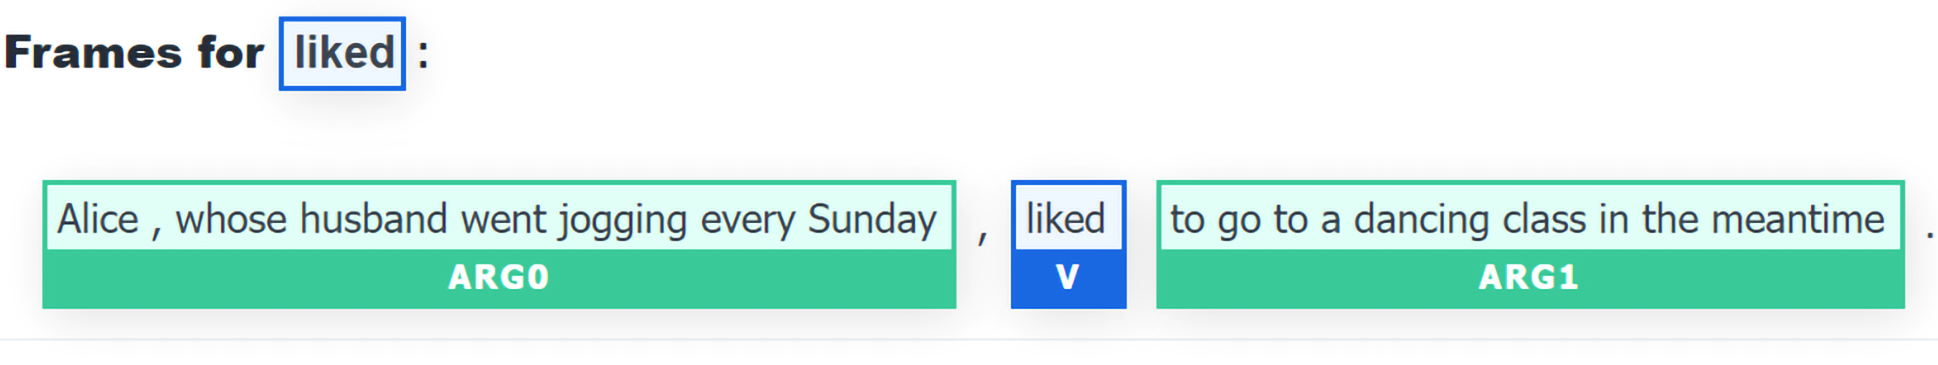

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_14.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_15.png', width=800) #This is used for rendering images in the notebook

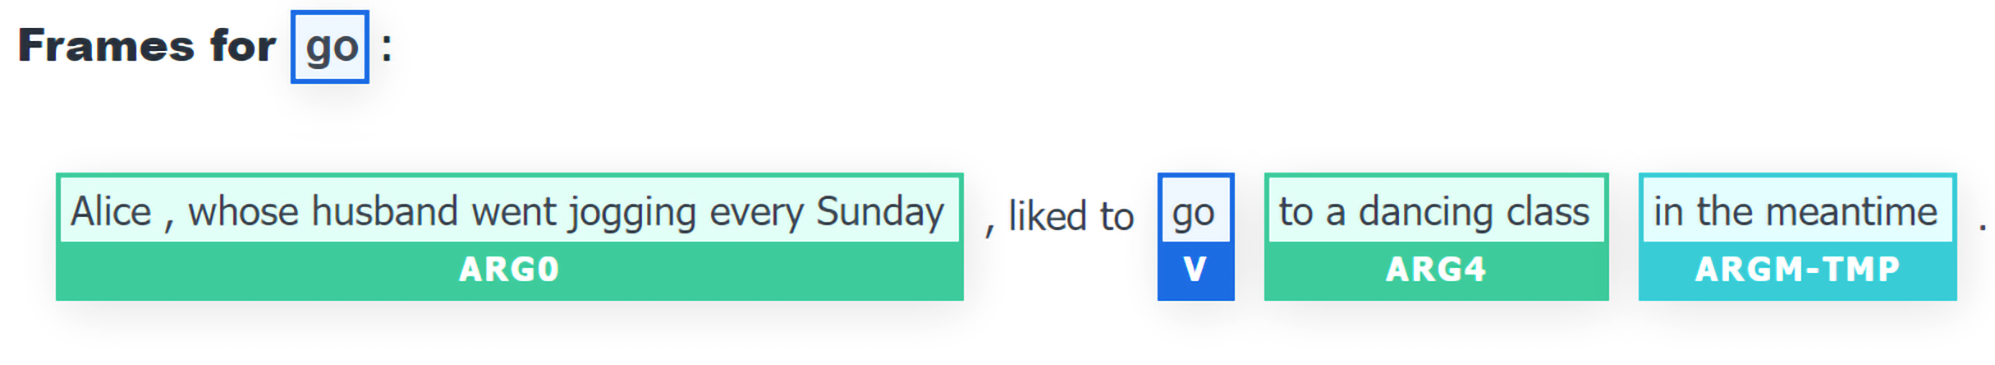

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_15.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_16.png', width=400) #This is used for rendering images in the notebook

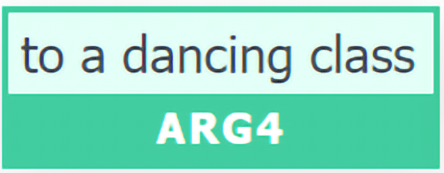

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_16.png') or print('Image not found'))

In [ ]:
full(prediction)

{
 "verbs": [
  {
   "description": "Alice , [ARG0: whose husband] [V: went] [ARG1: jogging] [ARGM-TMP: every Sunday] , liked to go to a dancing class in the meantime .",
   "tags": [
    "O",
    "O",
    "B-ARG0",
    "I-ARG0",
    "B-V",
    "B-ARG1",
    "B-ARGM-TMP",
    "I-ARGM-TMP",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O"
   ],
   "verb": "went"
  },
  {
   "description": "Alice , [ARG0: whose husband] went [V: jogging] [ARGM-TMP: every Sunday] , liked to go to a dancing class in the meantime .",
   "tags": [
    "O",
    "O",
    "B-ARG0",
    "I-ARG0",
    "O",
    "B-V",
    "B-ARGM-TMP",
    "I-ARGM-TMP",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O"
   ],
   "verb": "jogging"
  },
  {
   "description": "[ARG0: Alice , whose husband went jogging every Sunday] , [V: liked] [ARG1: to go to a dancing class in the meantime] .",
   "tags": [
    "B-ARG0"

In [ ]:
#call the DataFrame function and display the full prediction
fp_pd(prediction)

words        went     jogging   liked          go
0      Alice           O           O  B-ARG0      B-ARG0
1          ,           O           O  I-ARG0      I-ARG0
2      whose      B-ARG0      B-ARG0  I-ARG0      I-ARG0
3    husband      I-ARG0      I-ARG0  I-ARG0      I-ARG0
4       went         B-V           O  I-ARG0      I-ARG0
5    jogging      B-ARG1         B-V  I-ARG0      I-ARG0
6      every  B-ARGM-TMP  B-ARGM-TMP  I-ARG0      I-ARG0
7     Sunday  I-ARGM-TMP  I-ARGM-TMP  I-ARG0      I-ARG0
8          ,           O           O       O           O
9      liked           O           O     B-V           O
10        to           O           O  B-ARG1           O
11        go           O           O  I-ARG1         B-V
12        to           O           O  I-ARG1      B-ARG4
13         a           O           O  I-ARG1      I-ARG4
14   dancing           O           O  I-ARG1      I-ARG4
15     class           O           O  I-ARG1      I-ARG4
16        in           O           O  I-ARG1  B-ARGM-TMP
17       the           O           O  I-ARG1  I-ARGM-TMP
18  meantime           O           O  I-ARG1  I-ARGM-TMP
19         .           O           O       O           O

## Sample 5

 "The bright sun, the blue sky, the warm sand, the palm trees, everything round off."

In [ ]:
prediction=predictor.predict(
    sentence="The bright sun, the blue sky, the warm sand, the palm trees, everything round off."
)
head(prediction)

Verb: round The bright sun , the blue sky , the warm sand , the palm trees , [ARG1: everything] [V: round] [ARGM-PRD: off] .


In [ ]:
full(prediction)

{
 "verbs": [
  {
   "description": "The bright sun , the blue sky , the warm sand , the palm trees , [ARG1: everything] [V: round] [ARGM-PRD: off] .",
   "tags": [
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "O",
    "B-ARG1",
    "B-V",
    "B-ARGM-PRD",
    "O"
   ],
   "verb": "round"
  }
 ],
 "words": [
  "The",
  "bright",
  "sun",
  ",",
  "the",
  "blue",
  "sky",
  ",",
  "the",
  "warm",
  "sand",
  ",",
  "the",
  "palm",
  "trees",
  ",",
  "everything",
  "round",
  "off",
  "."
 ]
}


In [ ]:
#call the DataFrame function and display the full prediction
fp_pd(prediction)

words       round
0          The           O
1       bright           O
2          sun           O
3            ,           O
4          the           O
5         blue           O
6          sky           O
7            ,           O
8          the           O
9         warm           O
10        sand           O
11           ,           O
12         the           O
13        palm           O
14       trees           O
15           ,           O
16  everything      B-ARG1
17       round         B-V
18         off  B-ARGM-PRD
19           .           O

In [ ]:
prediction=predictor.predict(
    sentence="The bright sun, the blue sky, the warm sand, the palm trees, everything rounds off."
)
head(prediction)

Verb: rounds [ARG1: The bright sun , the blue sky , the warm sand , the palm trees , everything] [V: rounds] [ARGM-PRD: off] .


In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_17.png', width=800) #This is used for rendering images in the notebook

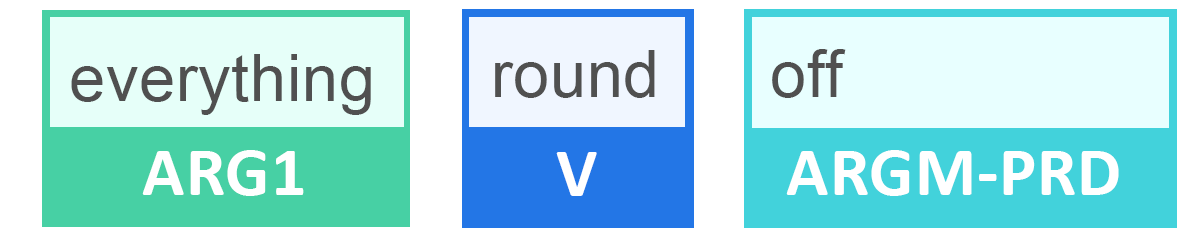

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_17.png') or print('Image not found'))

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_18.png', width=800) #This is used for rendering images in the notebook

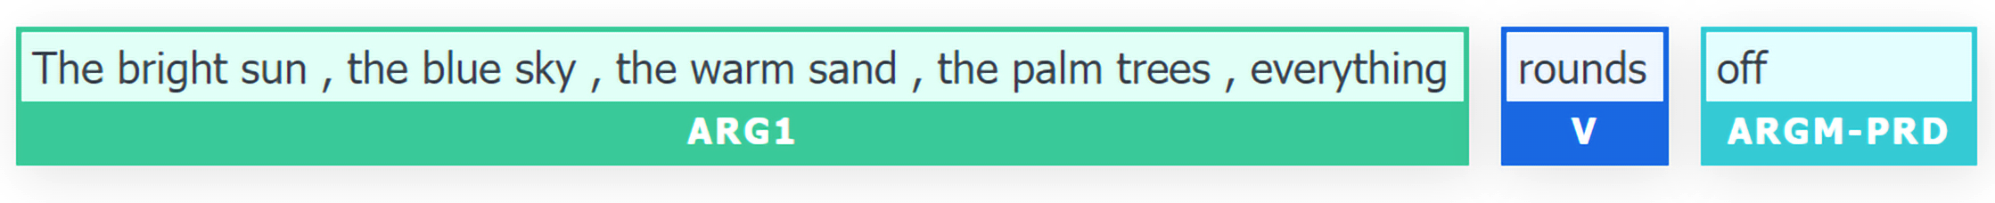

In [ ]:
# Delete this cell when repository goes public and uncomment the preceding cell
display(get_image_from_github('B17948_10_18.png') or print('Image not found'))

In [ ]:
full(prediction)

{
 "verbs": [
  {
   "description": "[ARG1: The bright sun , the blue sky , the warm sand , the palm trees , everything] [V: rounds] [ARGM-PRD: off] .",
   "tags": [
    "B-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "I-ARG1",
    "B-V",
    "B-ARGM-PRD",
    "O"
   ],
   "verb": "rounds"
  }
 ],
 "words": [
  "The",
  "bright",
  "sun",
  ",",
  "the",
  "blue",
  "sky",
  ",",
  "the",
  "warm",
  "sand",
  ",",
  "the",
  "palm",
  "trees",
  ",",
  "everything",
  "rounds",
  "off",
  "."
 ]
}


In [ ]:
#call the DataFrame function and display the full prediction
fp_pd(prediction)

words      rounds
0          The      B-ARG1
1       bright      I-ARG1
2          sun      I-ARG1
3            ,      I-ARG1
4          the      I-ARG1
5         blue      I-ARG1
6          sky      I-ARG1
7            ,      I-ARG1
8          the      I-ARG1
9         warm      I-ARG1
10        sand      I-ARG1
11           ,      I-ARG1
12         the      I-ARG1
13        palm      I-ARG1
14       trees      I-ARG1
15           ,      I-ARG1
16  everything      I-ARG1
17      rounds         B-V
18         off  B-ARGM-PRD
19           .           O

## Sample 6

"Ice pucks"

In [ ]:
prediction=predictor.predict(
    sentence="Now, ice pucks guys!"
)
head(prediction)

Verb: pucks [ARGM-TMP: Now] , [ARG2: ice] [V: pucks] [ARGM-DIS: guys] !


In [ ]:
full(prediction)

{
 "verbs": [
  {
   "description": "[ARGM-TMP: Now] , [ARG2: ice] [V: pucks] [ARGM-DIS: guys] !",
   "tags": [
    "B-ARGM-TMP",
    "O",
    "B-ARG2",
    "B-V",
    "B-ARGM-DIS",
    "O"
   ],
   "verb": "pucks"
  }
 ],
 "words": [
  "Now",
  ",",
  "ice",
  "pucks",
  "guys",
  "!"
 ]
}


In [ ]:
#call the DataFrame function and display the full prediction
fp_pd(prediction)

words       pucks
0    Now  B-ARGM-TMP
1      ,           O
2    ice      B-ARG2
3  pucks         B-V
4   guys  B-ARGM-DIS
5      !           O

In [ ]:
#Image('https://github.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/raw/main/Notebook%20images/10/B17948_10_19.png', width=800) #This is used for rendering images in the notebook

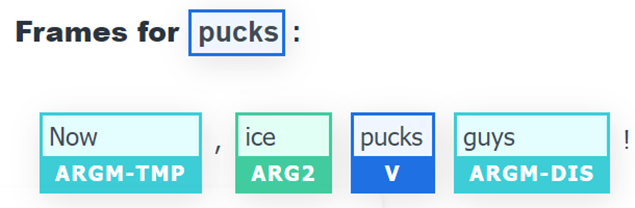

In [ ]:
# Delete this cell when repository goes public and uncomment the following cell
display(get_image_from_github('B17948_10_19.png') or print('Image not found'))